In [ ]:
!pip install ta

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import ta
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_aapl = yf.download('AAPL', start = '2015-01-01', end = '2025-08-16')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_aapl.to_csv('Apple.csv')

In [ ]:
df_aapl = pd.read_csv('Apple.csv')
df_aapl = df_aapl.iloc[2:, :]
df_aapl.rename(columns = {'Price':'Date'}, inplace = True)
df_aapl['Close'] = pd.to_numeric(df_aapl['Close'])
df_aapl['Volume'] = pd.to_numeric(df_aapl['Volume'])
df_aapl.head()

,Date,Close,High,Low,Open,Volume
2,2015-01-02,24.261044,24.729266505118662,23.82166783410134,24.718170500399545,212818400
3,2015-01-05,23.577576,24.11015184940222,23.39117495671791,24.030265339880305,257142000
4,2015-01-06,23.579790,23.839420368550986,23.218081360876567,23.64192367752137,263188400
5,2015-01-07,23.910431,24.010288179106578,23.677428352078227,23.788381627754344,160423600
6,2015-01-08,24.829124,24.886820629369133,24.12124199427357,24.23885389125135,237458000


In [ ]:
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])
df_aapl['DayOfWeek'] = df_aapl['Date'].dt.dayofweek
df_aapl['Month'] = df_aapl['Date'].dt.month

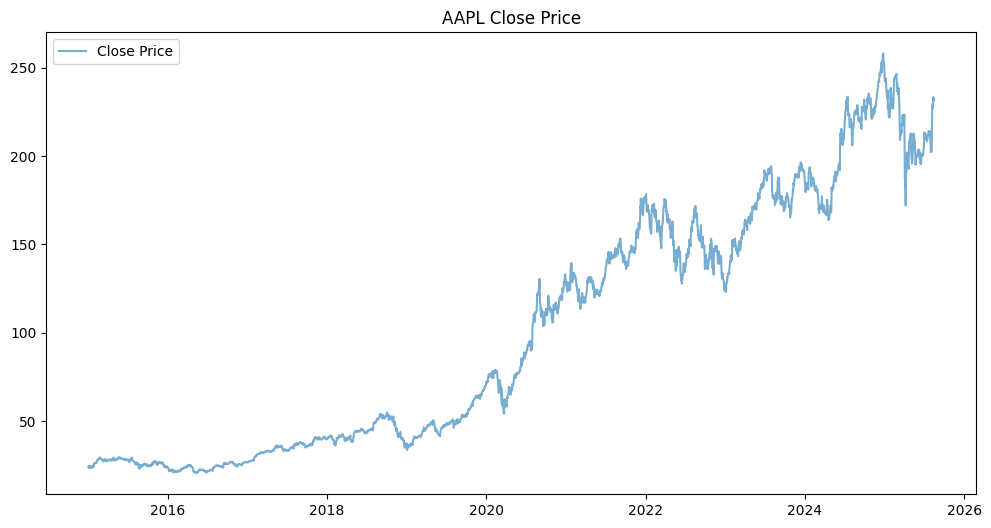

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_aapl['Date'], df_aapl['Close'], label="Close Price", alpha=0.6)
plt.legend()
plt.title("AAPL Close Price")
plt.show()

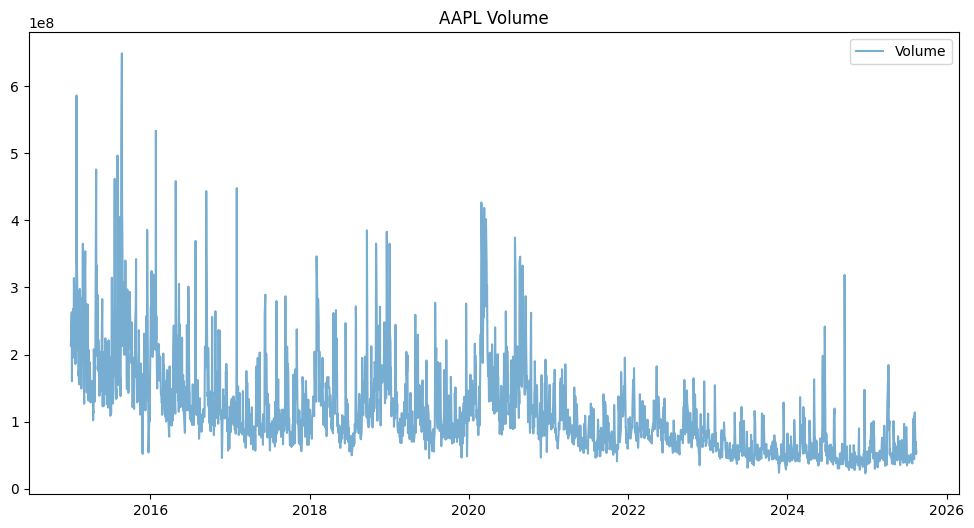

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_aapl['Date'], df_aapl['Volume'], label="Volume", alpha=0.6)
plt.legend()
plt.title("AAPL Volume")
plt.show()

In [ ]:
#check stationary
from statsmodels.tsa.stattools import adfuller
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# of Lags']
    out = pd.Series(result[0:3], index=labels)
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    return out

test_result = adf_test(df_aapl['Close'], title = 'Apple Closing Price')
print(test_result)

Augmented Dickey-Fuller Test: Apple Closing Price
ADF Statistic            0.036617
p-value                  0.961458
# of Lags               18.000000
Critical Value (1%)     -3.432818
Critical Value (5%)     -2.862630
Critical Value (10%)    -2.567350
dtype: float64


#Split train test

## Train data Feature Engineering

In [ ]:
train_size = int(len(df_aapl) * 0.8)
train_df = df_aapl[:train_size]
window_size = 50
train_df.head()

,Date,Close,High,Low,Open,Volume,DayOfWeek,Month
2,2015-01-02,24.261044,24.729266505118662,23.82166783410134,24.718170500399545,212818400,4,1
3,2015-01-05,23.577576,24.11015184940222,23.39117495671791,24.030265339880305,257142000,0,1
4,2015-01-06,23.579790,23.839420368550986,23.218081360876567,23.64192367752137,263188400,1,1
5,2015-01-07,23.910431,24.010288179106578,23.677428352078227,23.788381627754344,160423600,2,1
6,2015-01-08,24.829124,24.886820629369133,24.12124199427357,24.23885389125135,237458000,3,1


In [ ]:
#Percentage change
train_df['Return'] = train_df['Close'].pct_change()
# sns.histplot(train_df['Return'])
# plt.show()

In [ ]:
#Moving average trong 50 phiên
train_df['SMA_50'] = train_df['Close'].rolling(window = window_size).mean()
#Exponential MA trong 50 phiên
train_df['EMA_50'] = train_df['Close'].ewm(span = window_size, adjust = False).mean()
train_df.tail()

,Date,Close,High,Low,Open,Volume,DayOfWeek,Month,Return,SMA_50,EMA_50
2133,2023-06-22,184.936371,184.98582209518955,181.64311708726814,181.7123518491607,51245300,3,6,0.016525,171.734745,172.306767
2134,2023-06-23,184.619919,185.49021256870566,182.968349622031,183.50239899871212,53117000,4,6,-0.001711,172.264854,172.789636
2135,2023-06-26,183.225479,185.97479955864205,183.18591209060443,184.76826151663462,48088700,0,6,-0.007553,172.659226,173.198885
2136,2023-06-27,185.984665,186.31102501891434,183.62104032161758,183.838613722899,50730800,1,6,0.015059,173.115696,173.700288
2137,2023-06-28,187.161560,187.80438104509085,185.52977442185306,185.8561194768788,51216800,2,6,0.006328,173.595309,174.228181


In [ ]:
#Moving average trong 20 phiên
train_df['SMA_20'] = train_df['Close'].rolling(window = 20).mean()
#Exponential MA trong 20 phiên
train_df['EMA_20'] = train_df['Close'].ewm(span = 20, adjust = False).mean()
df_aapl.tail()

,Date,Close,High,Low,Open,Volume,DayOfWeek,Month
2668,2025-08-11,227.179993,229.55999755859375,224.75999450683594,227.9199981689453,61806100,0,8
2669,2025-08-12,229.649994,230.8000030517578,227.07000732421875,228.00999450683594,55626200,1,8
2670,2025-08-13,233.330002,235.0,230.42999267578125,231.07000732421875,69878500,2,8
2671,2025-08-14,232.779999,235.1199951171875,230.85000610351562,234.05999755859375,51916300,3,8
2672,2025-08-15,231.589996,234.27999877929688,229.33999633789062,234.0,56038700,4,8


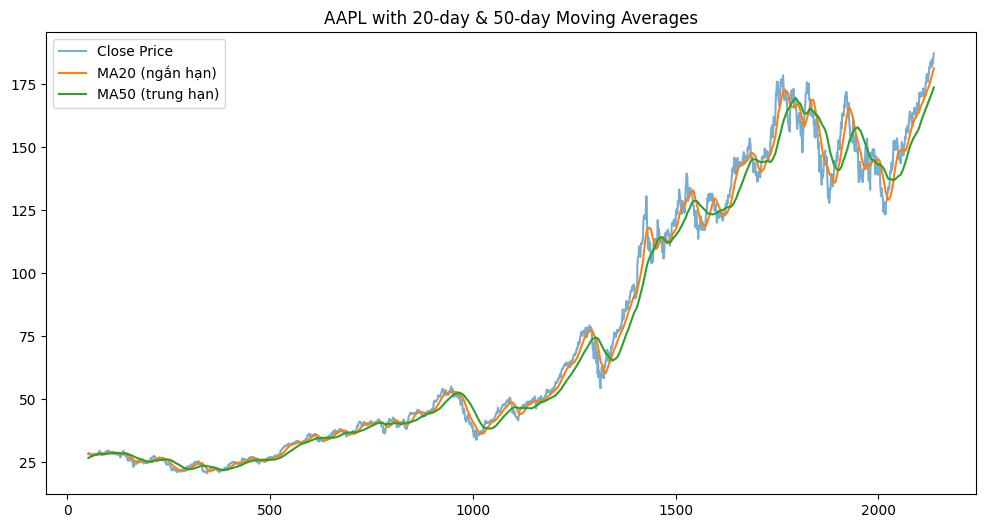

In [202]:
plt.figure(figsize=(12,6))
plt.plot(train_df['Close'], label="Close Price", alpha=0.6)
plt.plot(train_df['SMA_20'], label="MA20 (ngắn hạn)")
plt.plot(train_df['SMA_50'], label="MA50 (trung hạn)")
plt.legend()
plt.title("AAPL with 20-day & 50-day Moving Averages")
plt.show()

SMA20 (ngắn hạn) cao hơn SMA50 (trung hạn) → chứng tỏ trong 20 ngày gần đây giá trung bình cao hơn giá trung bình của 50 ngày.

Điều này có nghĩa: xu hướng ngắn hạn mạnh hơn xu hướng trung hạn → thị trường đang trong trạng thái tăng giá (bullish).

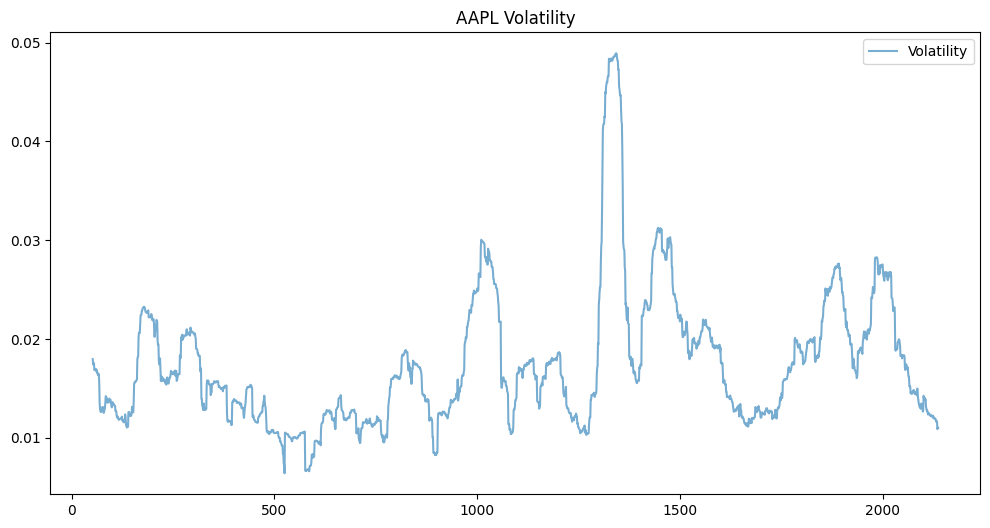

In [ ]:
#Volatility of AAPL
train_df['Volatility'] = train_df['Return'].rolling(window = 50).std()
#plot
plt.figure(figsize=(12,6))
plt.plot(train_df['Volatility'], label="Volatility", alpha=0.6)
plt.legend()
plt.title("AAPL Volatility")
plt.show()

In [ ]:
#lag feature for loop
for i in range(1, 1+ window_size):
    train_df[f'lag_{i}'] = train_df['Close'].shift(i)

In [ ]:
train_df['RSI'] = ta.momentum.RSIIndicator(train_df['Close'], window=14).rsi()
train_df['MACD'] = ta.trend.MACD(train_df['Close']).macd()

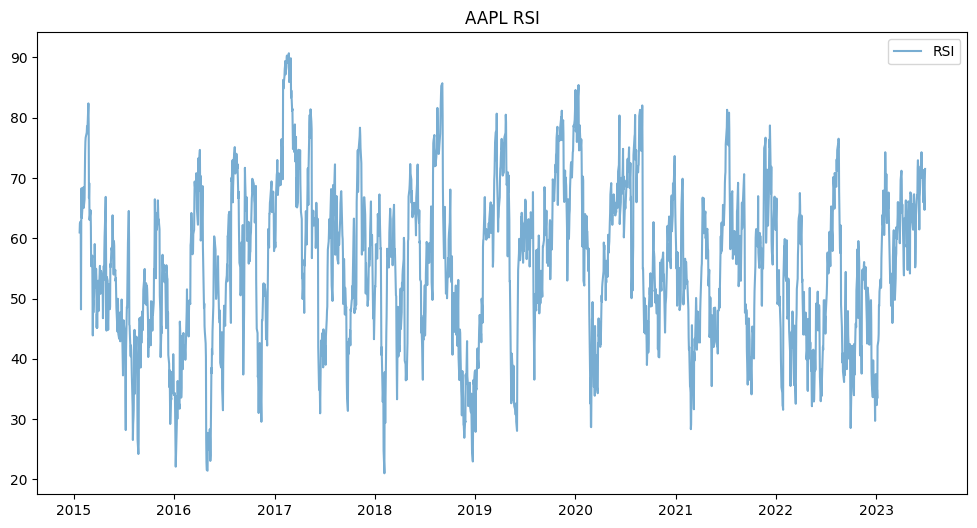

In [ ]:
#plot rsi over time
plt.figure(figsize=(12,6))
plt.plot(train_df['Date'], train_df['RSI'], label="RSI", alpha=0.6)
plt.legend()
plt.title("AAPL RSI")
plt.show()

Most of the RSI is (70 < RSI) so dont have a lot of overbought

In [ ]:
train_df.dropna(inplace=True)

In [ ]:
#sort value based on date
train_df.sort_values(by = 'Date', inplace = True, ascending = True)
train_df

,Date,Close,High,Low,Open,Volume,DayOfWeek,Month,Return,SMA_50,...,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50,RSI,MACD
52,2015-03-17,28.302271,28.3646496774058,27.992603548458405,28.04829913781081,204092400,1,3,0.016727,26.693596,...,24.458540,24.243294,24.855753,24.829124,23.910431,23.579790,23.577576,24.261044,56.042624,0.225256
53,2015-03-18,28.620852,28.774571896843646,28.153008876869432,28.29336115891731,261083600,2,3,0.011256,26.794462,...,24.365343,24.458540,24.243294,24.855753,24.829124,23.910431,23.579790,23.577576,59.049487,0.255389
54,2015-03-19,28.404747,28.79461608587527,28.38246911626775,28.683224921133004,183238000,3,3,-0.007551,26.890961,...,23.704056,24.365343,24.458540,24.243294,24.855753,24.829124,23.910431,23.579790,56.239204,0.258848
55,2015-03-20,28.048302,28.60525594142023,27.883443213167936,28.5718399445157,274780400,4,3,-0.012549,26.973718,...,23.519880,23.704056,24.365343,24.458540,24.243294,24.855753,24.829124,23.910431,51.855486,0.230174
56,2015-03-23,28.340143,28.482723775101412,28.186422834730436,28.32009360761879,150838800,0,3,0.010405,27.043939,...,24.125683,23.519880,23.704056,24.365343,24.458540,24.243294,24.855753,24.829124,54.951631,0.228366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,2023-06-22,184.936371,184.98582209518955,181.64311708726814,181.7123518491607,51245300,3,6,0.016525,171.734745,...,164.583313,165.551147,164.405548,163.180908,163.161194,163.506836,158.114517,158.805847,71.336653,3.616824
2134,2023-06-23,184.619919,185.49021256870566,182.968349622031,183.50239899871212,53117000,4,6,-0.001711,172.264854,...,162.973526,164.583313,165.551147,164.405548,163.180908,163.161194,163.506836,158.114517,70.090834,3.622161
2135,2023-06-26,183.225479,185.97479955864205,183.18591209060443,184.76826151663462,48088700,0,6,-0.007553,172.659226,...,163.279663,162.973526,164.583313,165.551147,164.405548,163.180908,163.161194,163.506836,64.726669,3.473827
2136,2023-06-27,185.984665,186.31102501891434,183.62104032161758,183.838613722899,50730800,1,6,0.015059,173.115696,...,161.739029,163.279663,162.973526,164.583313,165.551147,164.405548,163.180908,163.161194,69.672541,3.538130


## Test data Feature engineering

In [ ]:
test_df = df_aapl[train_size - window_size - 25:]

In [ ]:
test_df['Return'] = test_df['Close'].pct_change()

In [ ]:
test_df['SMA_50'] = test_df['Close'].rolling(window = window_size).mean()
#Exponential MA trong 50 phiên
test_df['EMA_50'] = test_df['Close'].ewm(span = window_size, adjust = False).mean()

In [ ]:
test_df['SMA_20'] = test_df['Close'].rolling(window = 20).mean()
#Exponential MA trong 20 phiên
test_df['EMA_20'] = test_df['Close'].ewm(span = 20, adjust = False).mean()

In [ ]:
test_df['Volatility'] = test_df['Return'].rolling(window = 50).std()

In [ ]:
for i in range(1, 1+ window_size):
    test_df[f'lag_{i}'] = test_df['Close'].shift(i)

In [ ]:
test_df['RSI'] = ta.momentum.RSIIndicator(test_df['Close'], window=14).rsi()
test_df['MACD'] = ta.trend.MACD(test_df['Close']).macd()

In [ ]:
test_df.dropna(inplace=True)

In [ ]:
test_df

,Date,Close,High,Low,Open,Volume,DayOfWeek,Month,Return,SMA_50,...,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48,lag_49,lag_50,RSI,MACD
2113,2023-05-23,169.666763,171.46668610985583,169.3898544266195,171.2194449613945,50747300,1,5,-0.015155,163.442750,...,155.872665,157.304688,155.447998,153.077774,153.917267,151.092697,150.697662,148.603928,55.256989,2.529324
2114,2023-05-24,169.943680,170.51728111058472,168.63825433413288,169.2019563309073,45143500,2,5,0.001632,163.827670,...,156.959015,155.872665,157.304688,155.447998,153.077774,153.917267,151.092697,150.697662,55.958943,2.293282
2115,2023-05-25,171.081009,171.98095531956056,169.79535178285977,170.50740757419857,56058300,3,5,0.006692,164.227436,...,158.262680,156.959015,155.872665,157.304688,155.447998,153.077774,153.917267,151.092697,58.816707,2.172943
2116,2023-05-26,173.494049,173.83030849826073,171.19965909306288,171.40734829469508,54835000,4,5,0.014105,164.618972,...,156.317108,158.262680,156.959015,155.872665,157.304688,155.447998,153.077774,153.917267,64.134258,2.246390
2117,2023-05-30,175.343399,177.01475137371042,174.62145922859648,175.00715475837933,55964400,1,5,0.010659,165.064284,...,155.694901,156.317108,158.262680,156.959015,155.872665,157.304688,155.447998,153.077774,67.588329,2.425860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,2025-08-11,227.179993,229.55999755859375,224.75999450683594,227.9199981689453,61806100,0,8,-0.008337,206.982850,...,201.221634,203.688828,200.402573,202.590088,203.039566,201.471344,200.622314,199.723328,70.245035,3.378045
2669,2025-08-12,229.649994,230.8000030517578,227.07000732421875,228.00999450683594,55626200,1,8,0.010872,207.563404,...,202.440247,201.221634,203.688828,200.402573,202.590088,203.039566,201.471344,200.622314,72.050810,4.277480
2670,2025-08-13,233.330002,235.0,230.42999267578125,231.07000732421875,69878500,2,8,0.016024,208.200577,...,198.554657,202.440247,201.221634,203.688828,200.402573,202.590088,203.039566,201.471344,74.530830,5.226981
2671,2025-08-14,232.779999,235.1199951171875,230.85000610351562,234.05999755859375,51916300,3,8,-0.002357,208.795386,...,198.974182,198.554657,202.440247,201.221634,203.688828,200.402573,202.590088,203.039566,73.481374,5.867450


## Min Max Scaler

In [ ]:
a = train_df['Date']
b = test_df['Date']

In [ ]:
train_df.drop(['Date'], axis = 1, inplace = True)
test_df.drop(['Date'], axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
train_df_scaled = scaler.fit_transform(train_df)
test_df_scaled = scaler.transform(test_df)

# Create a separate scaler for the 'Close' price
close_scaler = MinMaxScaler(feature_range=(0,1))
# Fit the close_scaler only on the 'Close' column of the training data
close_scaler.fit(train_df[['Close']])

MinMaxScaler()

In [ ]:
#lstm reshape
seq_length = 50
def create_sequences(data_array, seq_length):
    X, y = [], []
    for i in range(len(data_array) - seq_length):
        X.append(data_array[i:i+seq_length])
        y.append(data_array[i+seq_length])
    return np.array(X), np.array(y)
    # Create sequences for training
X_train, y_train = create_sequences(train_df_scaled, seq_length)
X_test, y_test = create_sequences(test_df_scaled, seq_length)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2036, 50, 65)
(510, 50, 65)
(2036, 65)
(510, 65)


In [ ]:
#build LSTm model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=y_train.shape[1] if y_train.ndim > 1 else 1))

model.compile(optimizer= 'adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=32, batch_size=32)

Epoch 1/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.1153
Epoch 2/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0067
Epoch 3/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0056
Epoch 4/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0051
Epoch 5/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0046
Epoch 6/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0042
Epoch 7/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0040
Epoch 8/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0036
Epoch 9/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0035
Epoch 10/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0034
Epoch 11/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0034
Epoch 12/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0032
Epoch 13/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0034
Epoch 14/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0031
Epoch 15/32
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0031
Epoc

In [ ]:
y_pred = model.predict(X_test)
#inverse scaler
y_train_inverse = scaler.inverse_transform(y_train)
y_test_o = scaler.inverse_transform(y_test)
y_pred_o = scaler.inverse_transform(y_pred)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.02177705272361333
Root Mean Squared Error (RMSE): 0.14757050085844844
R-squared (R2): 0.018252842831842756


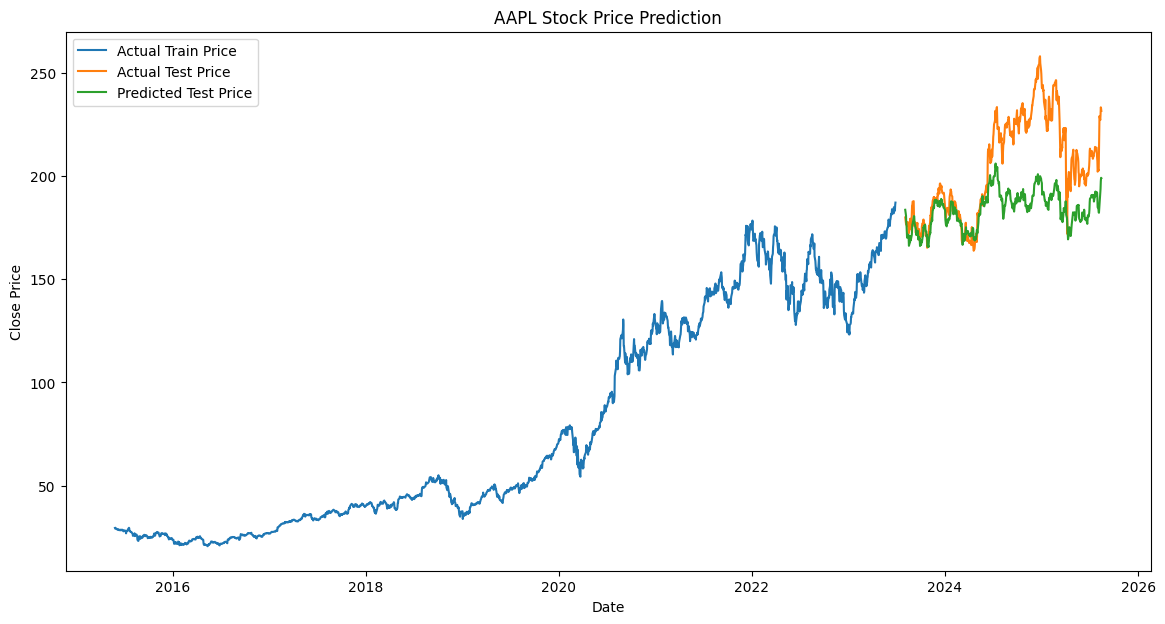

In [201]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(a[seq_length:], close_scaler.inverse_transform(y_train[:, train_df.columns.get_loc('Close')].reshape(-1, 1)), label='Actual Train Price')
plt.plot(b[seq_length:], close_scaler.inverse_transform(y_test[:, train_df.columns.get_loc('Close')].reshape(-1, 1)), label='Actual Test Price')
plt.plot(b[seq_length:], close_scaler.inverse_transform(y_pred[:, train_df.columns.get_loc('Close')].reshape(-1, 1)), label='Predicted Test Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()